In [1]:
import sys
import os
sys.path.append("../")

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from hms_pipeline.preproc import *

## Update the path of this block

In [3]:
# The root directory of the dataset
DATASET_ROOT = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification"

# Your processed data output directory
DATA_OUTPUT_ROOT = "/home/maxc/workspace/kaggle-hms-pub/kaggle-hms-pub/tmp/processed_data"


In [ ]:
# (Optional) The subdirectory of each type of processed data
# You will need the path of the following directories in the training step
RAW_EEG_OUTPUT_DIR = os.path.join(DATA_OUTPUT_ROOT, "raw_eegs")
LONG_SPEC_OUTPUT_DIR = os.path.join(DATA_OUTPUT_ROOT, "long_specs")
EEG_SPEC_OUTPUT_DIR = os.path.join(DATA_OUTPUT_ROOT, "eeg_specs")

## Raw EEG
check the preprocessing function for raw eeg on a single sample

[1628180742 2277392603  722738444  387987538 2175806584 1626798710
 2529955608 1202099836 3037445252 2289322082]
eeg_id                              1612845714
eeg_sub_id                                  19
eeg_label_offset_seconds                  82.0
spectrogram_id                        80281365
spectrogram_sub_id                          19
spectrogram_label_offset_seconds          82.0
label_id                             602474321
patient_id                               54199
expert_consensus                           GPD
seizure_vote                                 0
lpd_vote                                     0
gpd_vote                                     3
lrda_vote                                    0
grda_vote                                    0
other_vote                                   0
Name: 4830, dtype: object
LL (129600, 4)
RL (129600, 4)
LP (129600, 4)
RP (129600, 4)
ML (129600, 2)
LL (25920, 4)
RL (25920, 4)
LP (25920, 4)
RP (25920, 4)
ML (25920, 2)
(256, 10368

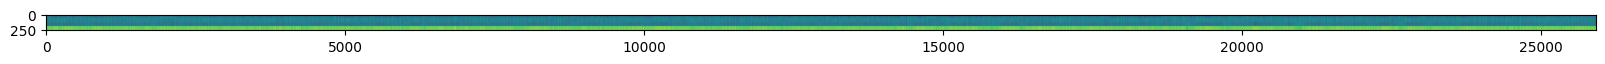

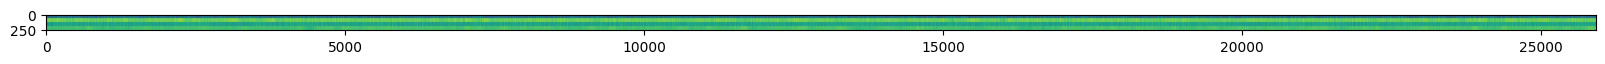

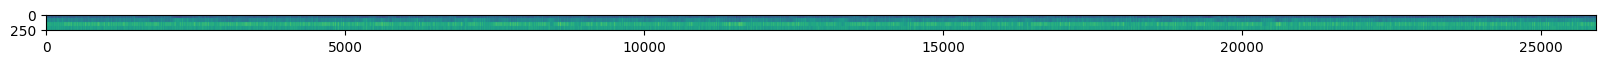

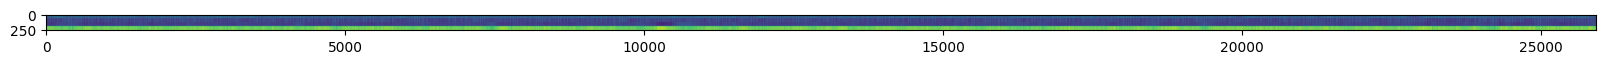

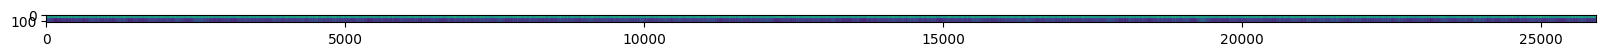

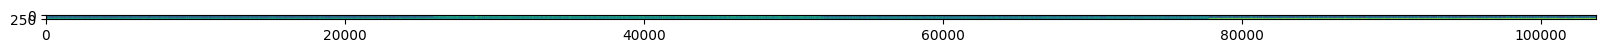

In [4]:
eeg_dir = os.path.join(DATASET_ROOT, "train_eegs")
train_df_path = os.path.join(DATASET_ROOT, "train.csv")
train_df = pd.read_csv(train_df_path)

sample_eeg_list = train_df["eeg_id"].unique()[:10]
sample_spec_list = train_df["spectrogram_id"].unique()[:10]
print(sample_eeg_list)

sample_eeg_dir = os.path.join(DATASET_ROOT, "train_eegs")

sample_row = train_df.sample().iloc[0]
print(sample_row)
sample_long_spec_dir = os.path.join(DATASET_ROOT, "train_spectrograms")

# random select a spectrogram from the list

sample_eeg = sample_row["eeg_id"]
# sample_eeg = 2108478615

test_eeg_path = os.path.join(sample_eeg_dir, str(sample_eeg) + ".parquet")
eeg_dict = load_raw_eeg(test_eeg_path, filter=None)

for key in eeg_dict.keys():
    print(key, eeg_dict[key].shape)

resized_eeg = resize_eeg_dict(eeg_dict, 40)


stacked_img = []
for key in resized_eeg.keys():
    print(key, resized_eeg[key].shape)
    # plot the img
    img = resized_eeg[key].T
    plt.figure(figsize=(20, 10))
    img = np.repeat(img, 64, axis=0)
    if key!="ML":
        stacked_img.append(img)
    plt.imshow(img)

stacked_img = np.hstack(stacked_img)

plt.figure(figsize=(20, 10))
plt.imshow(stacked_img)
print(stacked_img.shape)


Run the batch preprocessing for a small set of sample


In [5]:
test_raw_eeg_output_dir = os.path.join(DATA_OUTPUT_ROOT, "test_preproc/raw_eegs")

preprocess_raw_eeg_list(eeg_dir, sample_eeg_list, test_raw_eeg_output_dir, filter_type="bandpass", sub_width=500)

{'filter_type': 'bandpass', 'freq': 10, 'sub_width': 500, 'norm_type': 'global', 'highcut': 20}


100%|██████████| 10/10 [00:00<00:00, 98.16it/s]


## Long Spec

eeg_id                              2523195722
eeg_sub_id                                   1
eeg_label_offset_seconds                   4.0
spectrogram_id                       128940539
spectrogram_sub_id                           1
spectrogram_label_offset_seconds           4.0
label_id                            2113127180
patient_id                               31386
expert_consensus                         Other
seizure_vote                                 0
lpd_vote                                     1
gpd_vote                                     3
lrda_vote                                    0
grda_vote                                    3
other_vote                                   8
Name: 7020, dtype: object
128940539
LL (100, 304)
RL (100, 304)
LP (100, 304)
RP (100, 304)
LL (112, 304)
-1.0 0.45120877
RL (112, 304)
-1.0 0.3624944
LP (112, 304)
-1.0 0.42210403
RP (112, 304)
-1.0 0.31564164


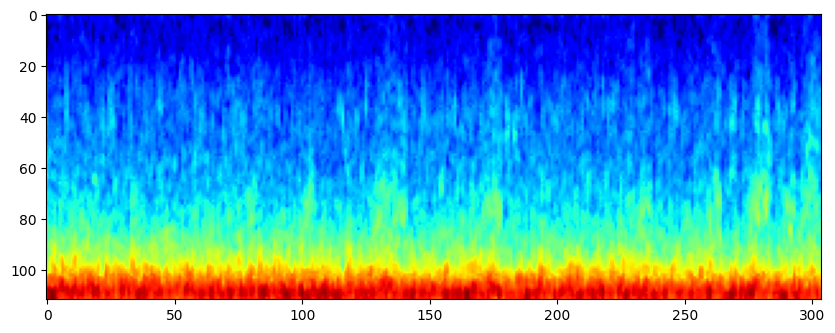

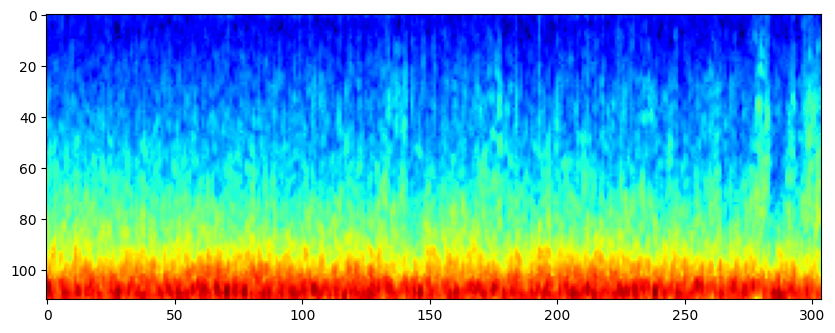

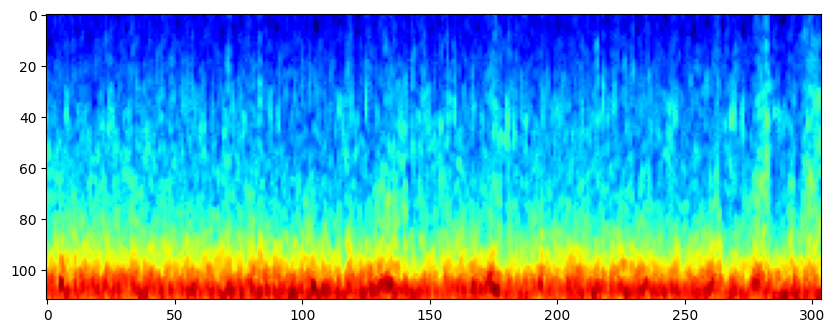

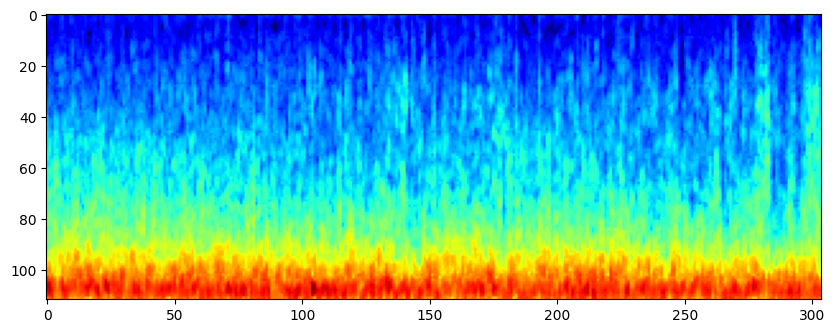

In [6]:
# randomly select a row in the train_df
sample_row = train_df.sample().iloc[0]
print(sample_row)
sample_long_spec_dir = os.path.join(DATASET_ROOT, "train_spectrograms")
# random select a spectrogram from the list
test_spec_id = sample_row["spectrogram_id"]
# test_spec_id = 1927055704
# test_spec_id = 327428082
# test_spec_id = 1564580568
# test_spec_id = 2132470150
print(test_spec_id)
test_long_spec_path = os.path.join(sample_long_spec_dir, str(test_spec_id) + ".parquet")
long_spec_dict = load_long_spec(test_long_spec_path)

for key in long_spec_dict.keys():
    print(key, long_spec_dict[key].shape)

resized_long_spec_dict = resize_long_spec_dict(long_spec_dict, 112)

for key in resized_long_spec_dict.keys():
    print(key, resized_long_spec_dict[key].shape)
    img = resized_long_spec_dict[key]
    print(img.min(), img.max())
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap="jet")

In [7]:
long_spec_output_dir = os.path.join(DATA_OUTPUT_ROOT, "test_preproc/long_specs")

preprocess_long_spec_list(sample_long_spec_dir, sample_spec_list, long_spec_output_dir, 112)

{'signal_height': 112, 'freq': 0.5, 'sub_width': 300}


100%|██████████| 10/10 [00:00<00:00, 4120.95it/s]


## EEG Spec


eeg_id                              2308002414
eeg_sub_id                                   4
eeg_label_offset_seconds                  12.0
spectrogram_id                       261691774
spectrogram_sub_id                           4
spectrogram_label_offset_seconds          12.0
label_id                            1068636137
patient_id                               42165
expert_consensus                           GPD
seizure_vote                                 0
lpd_vote                                     3
gpd_vote                                     6
lrda_vote                                    0
grda_vote                                    0
other_vote                                   3
Name: 13266, dtype: object
/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_eegs/2308002414.parquet
LL (100, 1440)
RL (100, 1440)
LP (100, 1440)
RP (100, 1440)
ML (100, 1440)
LL (100, 1440)
RL (100, 1440)
LP (100, 1440)
RP (100, 1440)
ML (100, 1440)
LL (100, 720)


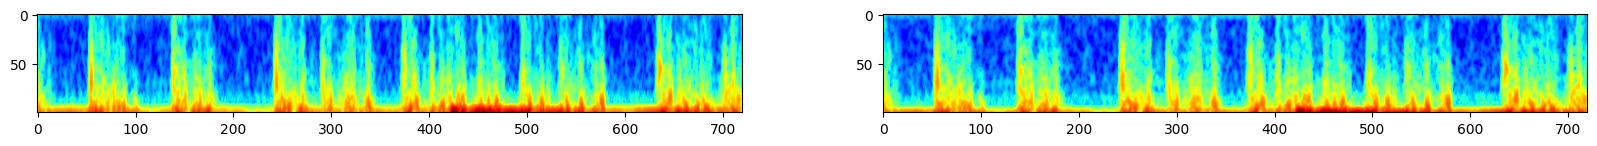

RL (100, 720)
-0.72519493 0.49673522


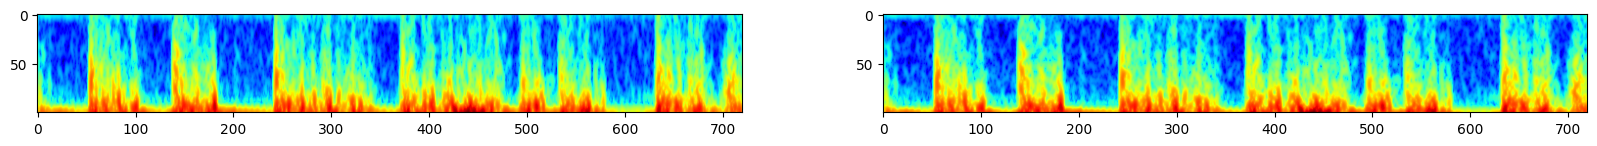

LP (100, 720)
-0.7412067 0.47658753


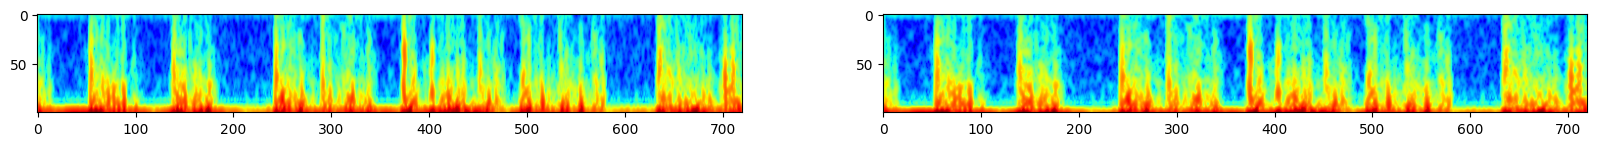

RP (100, 720)
-0.70980024 0.51836884


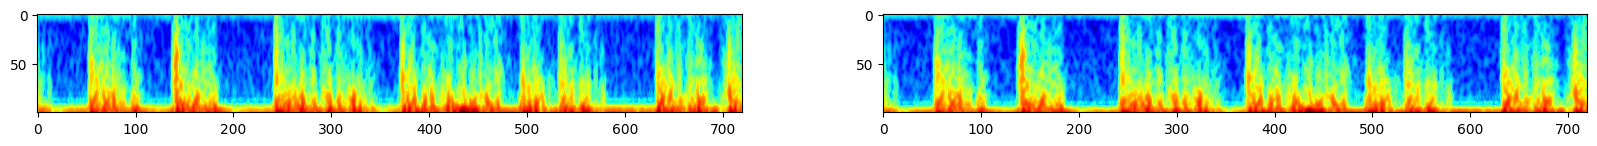

ML (100, 720)
-0.8864322 0.54882705


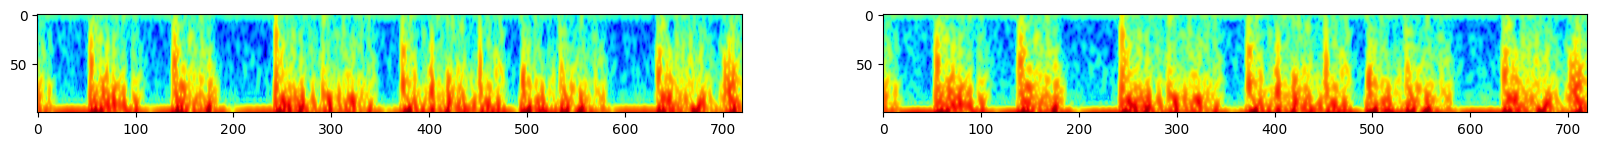

In [8]:

sample_eeg_dir = os.path.join(DATASET_ROOT, "train_eegs")
sample_long_spec_dir = os.path.join(DATASET_ROOT, "train_spectrograms")
sample_row = train_df.sample().iloc[0]
print(sample_row)

# random select a spectrogram from the list

sample_eeg = sample_row["eeg_id"]
# test_eeg = 1057623030
test_eeg_path = os.path.join(sample_eeg_dir, str(sample_eeg) + ".parquet")
print(test_eeg_path)


gf = 20
eeg_spec_dict = load_eeg_spec(test_eeg_path, height=100, gen_freq = gf, n_fft = 1024, win_length=160, prefilter=False, lowcut=0.5)

eeg_spec_dict_1 = load_eeg_spec(test_eeg_path, height=100, gen_freq=20, n_fft = 1024, win_length=200, prefilter=False, lowcut=0.5)
for key in eeg_spec_dict_1.keys():
    print(key, eeg_spec_dict_1[key].shape)

resized_eeg_spec_dict_1 = resize_eeg_spec_dict(eeg_spec_dict_1, freq = 10, gen_freq=20)

for key in eeg_spec_dict.keys():
    print(key, eeg_spec_dict[key].shape)

resized_eeg_spec_dict = resize_eeg_spec_dict(eeg_spec_dict, freq = 10, gen_freq=gf)
for key in resized_eeg_spec_dict.keys():
    print(key, resized_eeg_spec_dict[key].shape)
    img_0 = resized_eeg_spec_dict[key]
    plt.figure(figsize=(20, 10))
    img = resized_eeg_spec_dict[key]
    print(img.min(), img.max())

    # show img side by side
    plt.subplot(1, 2, 1)
    plt.imshow(resized_eeg_spec_dict[key], cmap="jet")
    plt.subplot(1, 2, 2)
    plt.imshow(resized_eeg_spec_dict_1[key], cmap="jet")

    plt.show()
    # break



In [9]:
sample_spec_output_dir = os.path.join(DATA_OUTPUT_ROOT, "test_preproc/eeg_specs")
sample_eeg_list = train_df["eeg_id"].unique()[:10]

preprocess_eeg_spec_list(eeg_dir, sample_eeg_list, sample_spec_output_dir, signal_height=112, sub_width=200)

{'signal_height': 112, 'hop': 2, 'freq': 4, 'gen_freq': 100, 'sub_width': 200, 'gen_width': 5000, 'lowcut': 0, 'prefilter': False, 'n_fft': 1024, 'win_length': 1024}


100%|██████████| 10/10 [00:00<00:00, 4696.34it/s]


## Gen full dataset

In [10]:
train_df = pd.read_csv(train_df_path)
eeg_ids = train_df["eeg_id"].unique()

# get the spec ids where the eeg_id is in the eeg_ids
train_df = train_df[train_df["eeg_id"].isin(eeg_ids)]
spec_ids = train_df["spectrogram_id"].unique()

input_eeg_dir = os.path.join(DATASET_ROOT, "train_eegs")
input_spec_dir = os.path.join(DATASET_ROOT, "train_spectrograms")

In [11]:
raw_eeg_output_dir = RAW_EEG_OUTPUT_DIR
preprocess_raw_eeg_list(eeg_dir, eeg_ids, raw_eeg_output_dir, filter_type="sosbandclip", sub_width=2500, num_workers=-1, norm_type="global") 

{'filter_type': 'sosbandclip', 'freq': 50, 'sub_width': 2500, 'norm_type': 'global', 'highcut': 20}


100%|██████████| 17089/17089 [02:01<00:00, 140.18it/s]


In [12]:
long_spec_output_dir = LONG_SPEC_OUTPUT_DIR
preprocess_long_spec_list(input_spec_dir, spec_ids, long_spec_output_dir, 100, num_workers=-1) # 4*100*300

{'signal_height': 100, 'freq': 0.5, 'sub_width': 300}


100%|██████████| 11138/11138 [01:02<00:00, 179.49it/s]


In [13]:
eeg_spec_output_dir = EEG_SPEC_OUTPUT_DIR
preprocess_eeg_spec_list(eeg_dir, eeg_ids, eeg_spec_output_dir, signal_height=100, sub_width=250, gen_freq=5, prefilter=False, num_workers=-1, n_fft=1024, win_length=200, lowcut=0.5)

{'signal_height': 100, 'hop': 40, 'freq': 5, 'gen_freq': 5, 'sub_width': 250, 'gen_width': 250, 'lowcut': 0.5, 'prefilter': False, 'n_fft': 1024, 'win_length': 200}


100%|██████████| 17089/17089 [06:17<00:00, 45.22it/s]
